In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [2]:
data=pd.read_csv(r'C:\Users\SHRIK\Desktop\shrikant\Projects\GreyAtom Projects\Olympic Hero\data\olympic.csv')
data.rename(columns={'Total':'Total_Medals'},inplace=True)
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


# Summer or Winter
Some Countries love Summer, some Winter. We think it has to do something with their Olympic performance.

For this task we will try to figure out which olympic event does a country perform better in.

In [3]:
#Creating new column 'Better_Event'
data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'] , 'Summer', 'Winter')
data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'] , 'Both', data['Better_Event'])

#Finding the value with max count in 'Better_Event' column
better_event=data['Better_Event'].value_counts().index.values[0]

#Printing the better event
print('Better_Event=', better_event)

Better_Event= Summer


# Top 10
So we figured out which is a better event for each country. Let's move on to finding out the best performing countries across all events

In this task we will try to find

Which are the top 10 performing teams at summer event (with respect to total medals), winter event and overall?
How many teams are present in all of the three lists above?

In [4]:
#Subsetting the dataframe
top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

#Dropping the last row
top_countries=top_countries[:-1]

#Function for top 10
def top_ten(data, col):
    
    #Creating a new list
    country_list=[]
    
    #Finding the top 10 values of 'col' column
    country_list= list((data.nlargest(10,col)['Country_Name']))
    
    #Returning the top 10 list
    return country_list



#Calling the function for Top 10 in Summer
top_10_summer=top_ten(top_countries,'Total_Summer')
print("Top 10 Summer:\n",top_10_summer, "\n")

#Calling the function for Top 10 in Winter
top_10_winter=top_ten(top_countries,'Total_Winter')
print("Top 10 Winter:\n",top_10_winter, "\n")

#Calling the function for Top 10 in both the events
top_10=top_ten(top_countries,'Total_Medals')
print("Top 10:\n",top_10, "\n")

#Extracting common country names from all three lists
common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))

print('Common Countries :\n', common, "\n")

#Code ends here

Top 10 Summer:
 ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 

Top 10 Winter:
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 

Top 10:
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 

Common Countries :
 ['Soviet Union', 'Germany', 'Sweden', 'United States'] 



# Plotting Top 10
From the lists that you have created from the previous task, let's plot the medal count of the top 10 countries for better visualisation

Text(0, 0.5, 'Total Medals')

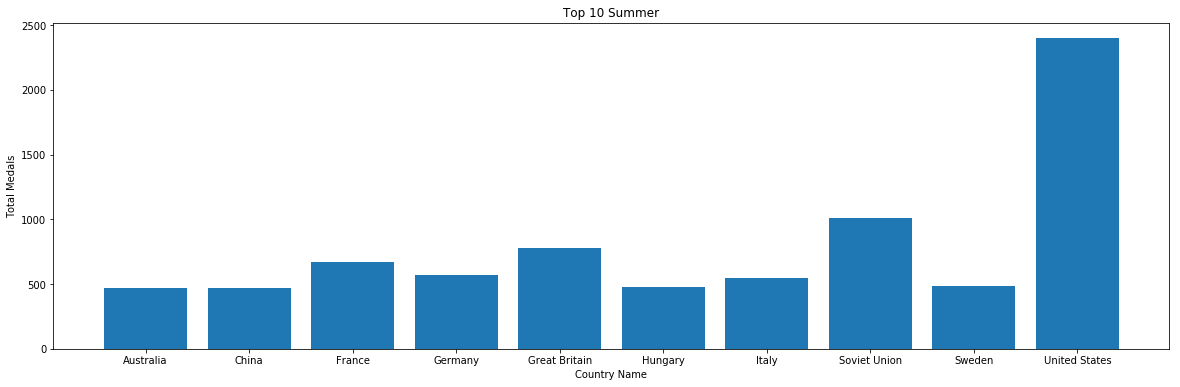

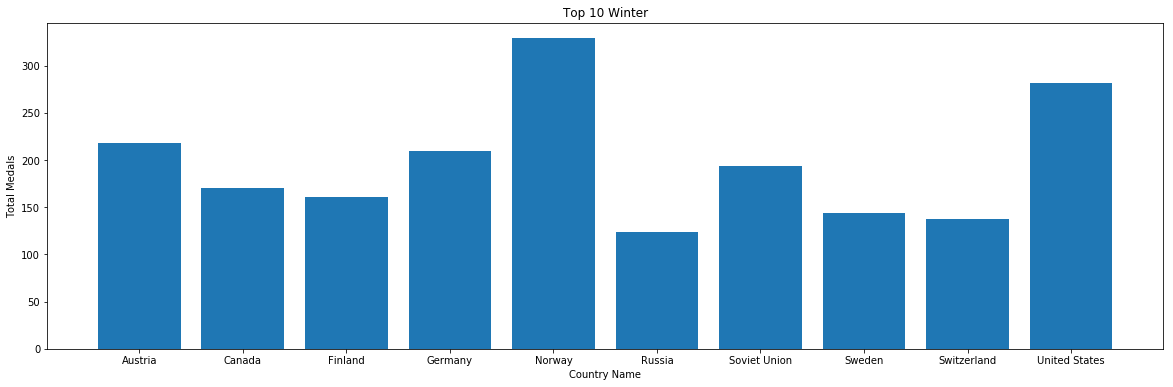

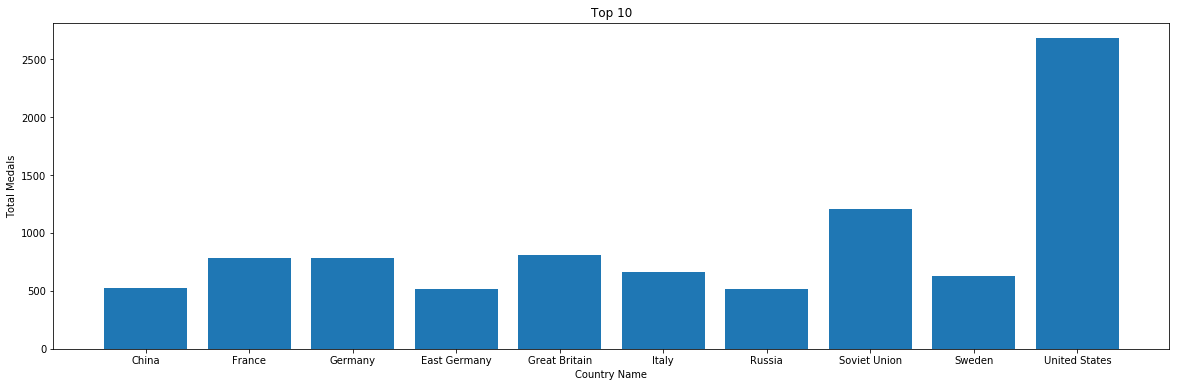

In [5]:
#Code starts here

#For Summer

#Creating the dataframe for Summer event
summer_df= data[data['Country_Name'].isin(top_10_summer)]

#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'])

#Changing the graph title
plt.title('Top 10 Summer')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')


#For Winter

#Creating the dataframe for Winter event
winter_df=data[data['Country_Name'].isin(top_10_winter)]

#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(winter_df['Country_Name'], winter_df['Total_Winter'])

#Changing the graph title
plt.title('Top 10 Winter')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')



#For both the events

#Creating the dataframe for both the events
top_df=data[data['Country_Name'].isin(top_10)]

#Plotting the bar graph
plt.figure(figsize=(20, 6))
plt.bar(top_df['Country_Name'], top_df['Total_Medals'])

#Changing the graph title
plt.title('Top 10')

#Changing the x-axis label
plt.xlabel('Country Name')

#Changing the y-axis label
plt.ylabel('Total Medals')

# Top performing country(Gold)
Winning silver or bronze medals is a big achievement but winning gold is bigger.

Using the above created dataframe subsets, in this task let's find out which country has had the best performance with respect to the ratio between gold medals won and total medals won.

In [6]:
#For Summer List

#Creating new column 'Golden_Ratio'
summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']


#Finding the max value of 'Golden_Ratio' column
summer_max_ratio=max(summer_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )


#For Winter List

#Creating new column 'Golden_Ratio'
winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']


#Finding the max value of 'Golden_Ratio' column
winter_max_ratio=max(winter_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )


#For Overall List

#Creating new column 'Golden_Ratio'
top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']

#Finding the max value of 'Golden_Ratio' column
top_max_ratio=max(top_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

Top Summer Country: China  with a ratio of 0.42
Top Winter Country: Soviet Union  with a ratio of 0.40
Top Country: China  with a ratio of 0.40


D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

# Best in the world
Best in the world
Winning Gold is great but is winning most gold equivalent to being the best overall perfomer? Let's find out

In [7]:
#Removing the last column of the dataframe
data_1=data[:-1]

#Creating a new column 'Total_Points'
data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1  # Use of position index to handle the ambiguity of having same name columns


#Finding the maximum value of 'Total_Points' column
most_points=max(data_1['Total_Points'])

#Finding the country assosciated with the max value of 'Total_Column' column
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('The maximum points achieved is ', most_points, ' by ', best_country )

The maximum points achieved is  5684  by  United States


D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Plot for the best
We know which country is best when it comes to winning the most points in Olympic Games. Let's plot the medal count to visualise their success better.

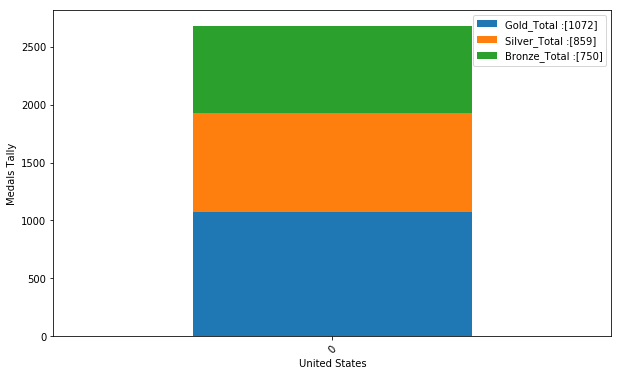

In [8]:
#Subsetting the dataframe
best=data[data['Country_Name']==best_country]
best.reset_index(drop = True, inplace = True)
best=best[['Gold_Total','Silver_Total','Bronze_Total']]


#Plotting bar plot
best.plot(kind='bar',stacked=True,figsize=(10,6))

#Changing the x-axis label
plt.xlabel('United States')

#Changing the y-axis label
plt.ylabel('Medals Tally')

#Rotating the ticks of X-axis
plt.xticks(rotation=45)

#Updating the graph legend
l=plt.legend()
l.get_texts()[0].set_text('Gold_Total :' + str(best['Gold_Total'].values))
l.get_texts()[1].set_text('Silver_Total :' + str(best['Silver_Total'].values))
l.get_texts()[2].set_text('Bronze_Total :' + str(best['Bronze_Total'].values))